In [1]:
from astropy.io.votable import parse_single_table
import numpy as np
import matplotlib.pyplot as plt

file = 'skyserver_30000_111021.xml'
table = parse_single_table(file)


NII = table.array['NII'].data
Hbeta = table.array['Hbeta'].data
Halpha = table.array['Halpha'].data
OIII = table.array['OIII'].data
OII = table.array['OII'].data
OI = table.array['OI'].data

H_alpha_beta = Halpha/Hbeta
H_alpha_beta.max()

OIII_Hbeta = np.log10(OIII/Hbeta)
NII_Halpha = np.log10(NII/Halpha)
OIII_Halpha = np.log10(OIII/Halpha)
OI_Halpha = np.log10(OI/Halpha)
OIII_OII = np.log10(OIII/OII)
#help(table)
#np.min(table.array['modelMag_r'].data/table.array['modelMagErr_r'].data)

In [2]:
def sort_xy(x,y):
    xy = x,y
    y = np.delete(y, np.where((xy[0]>1.0) | (xy[1]<-2.5) | (xy[1]>1.0)))
    x = np.delete(x, np.where((xy[0]>1.0) | (xy[1]<-2.5) | (xy[1]>1.0)))
    #xsmooth=np.linspace(x[0],x[-1])
    xy= x, y
    s_ind = xy[1].argsort()
    x = x[s_ind]
    y = y[s_ind]
    return x,y

/tmp/ipykernel_4349/2141379645.py:17: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  ax1.hist2d(NII_Halpha, OIII_Hbeta, bins, cmap='gist_heat_r', vmin=0.0, vmax=4.0)#plt.cm.jet)


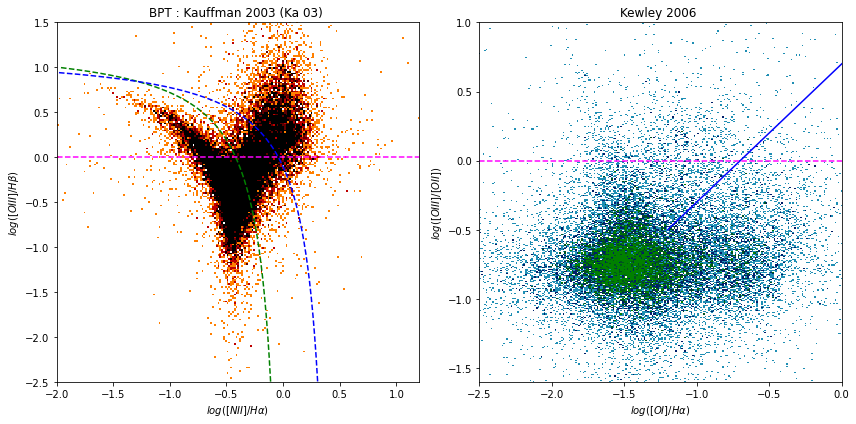

In [3]:

objid = table.array['objid'].data
ra = table.array['ra'].data
dec = table.array['dec'].data
z = table.array['z'].data
#modelMag_r = table.array['modelMag_r'].data
#modelMagErr_r = table.array['modelMagErr_r'].data


# -------- PLOT DATA ---------------------------------------------------------- #
# WHOLE SPECTRA 

fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(1,2,1) 
plt.grid()
#ax1.scatter(NII_Halpha, OIII_Hbeta, marker='.', cmap='viridius', color='grey')
bins=(350, 350)
ax1.hist2d(NII_Halpha, OIII_Hbeta, bins, cmap='gist_heat_r', vmin=0.0, vmax=4.0)#plt.cm.jet)
ax1.set_ylabel('$log ([OIII]/Hβ)$')
ax1.set_xlabel('$log ([NII]/Hα)$')
ax1.set_title('BPT : Kauffman 2003 (Ka 03) ')
#ax1.axhline(y=0, ls=':', color='r')
ax1.set_xlim(-2.0,1.2)
ax1.set_ylim(-2.5,1.5)

# DRAWING LINES ON PLOT


# Ka O3
x,a,q = NII_Halpha, 0.61, 1.3
p = (a/(x-0.05))
y = p+q

#ax2 = ax1.twiny()
#ax2.set_xlim(-2.5,0.1)
#ax1.plot(x,y,'.', color='blue', linewidth=0.01)
#xnew = np.linspace(0, 10, num=41, endpoint=True)

#ax1.plot(x,y,'b.')
xy = sort_xy(x,y)
ax1.plot(xy[0],xy[1],'g', linestyle='--')

#ax1.plot(x, y, '--')
# Ke O1
x,a,q = NII_Halpha, 0.61 , 1.19
p=(a/(x-0.47))
y = p+q
ke1 = sort_xy(x,y)
ax1.plot(ke1[0],ke1[1],'b', linestyle='--')

ax2 = fig.add_subplot(1,2,2) 

ax2.hist2d(OI_Halpha,OIII_OII,bins=(800,800), cmap='ocean_r', vmin=0.0, vmax=3.4)

# Seyfert - LINER
x,a,q = OI_Halpha, 1.0, 0.7
p = x
y = a*p+q
s_ind = y.argsort()
x = x[s_ind]
y = y[s_ind]
xy = x,y
x = np.delete(x, np.where(xy[0]<-1.2))
y = np.delete(y, np.where(xy[0]<-1.2))
ax2.plot(x,y, 'b', linestyle='-')

ax2.set_ylabel('$log ([OIII]/[OII])$')
ax2.set_xlabel('$log ([OI]/Hα)$')
ax2.set_title('Kewley 2006 ')
ax2.set_ylim(-1.6,1.0)
ax2.set_xlim(-2.5,0.0)
fig.tight_layout()

#ax1.annotate(f'$[N II]$',
#             xy=(6563,3.0e+45), xytext=(6563, 3.2e+45),)
#ax1.axvline(x=5100, color='magenta', ls=':')
ax1.axhline(y=0.0, color='magenta', ls='--')
ax2.axhline(y=0.0, color='magenta', ls='--')
plt.show()

# Assignment

For this project, query the SDSS database for emission-line galaxies and use
the BPT diagrams to identify Seyfert and LINER galaxies. Create histograms
of the magnitude distribution of each type and compare them. Is there a
noticeable difference? Perform this analysis in three different redshift ranges:
0.1 ă z ă 0.15, 0.2 ă z ă 0.25, and 0.3 ă z ă 0.4. (As of Data Release
16, there aren’t any galaxies of these types found above z „ 0.4.) Do the
differences between Seyferts and LINERs stay the same at all redshifts? Do
the relative numbers of each remain the same?
